In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Py-Torch Model

### Data (preparing & Loading)

In [3]:
# create known parameters
# creating a dataset
weight = 0.7
bias = 0.3

#creating a tensor
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### creating training and testing set

In [5]:
#create training and testing set
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### visualize

In [6]:
def plot_prediction(train_data = X_train,
                    test_data = X_test,
                    train_labels = y_train,
                    test_labels = y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop = {"size":14})


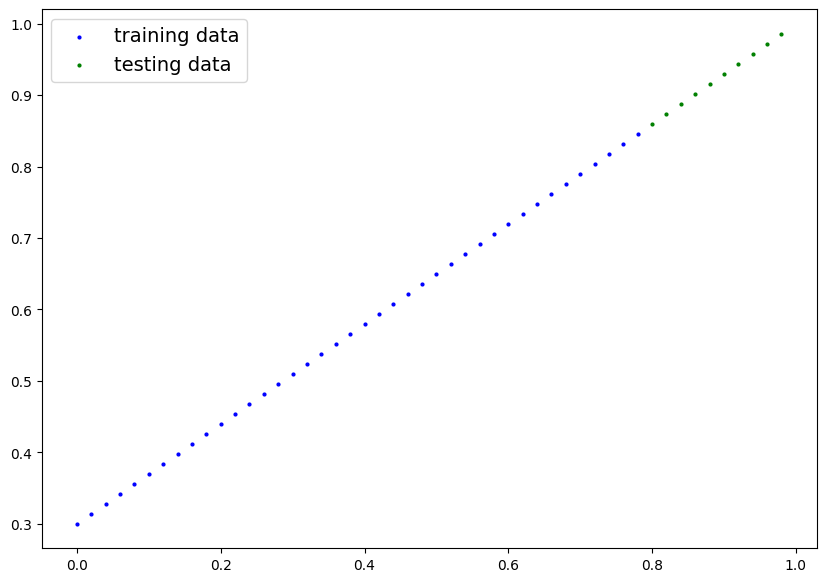

In [7]:
plot_prediction()

want to understand:from the above graph , if u want to know how much model is accurate the prediction in red color need to align the traing set as closely as possible to get good model.

### creating a model

In [8]:
#create a linear regression model class

class linear_regression_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with random weight and later adjust to ideal weight
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

# forward method to define computation in model
  def forward(self,x:torch.Tensor):
    return  self.weights * x + self.bias

In [9]:
#checking the contents of our pytorch model
#create a random seed
torch.manual_seed(42)

#create a instance
model_0 = linear_regression_model()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Make predictions

In [11]:
#make prediction using `torch.inference_mode()`
#predict y_test based on x_test
#when we pass data to model,it run through forward() method

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds # y-prediction

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
# original y_test
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

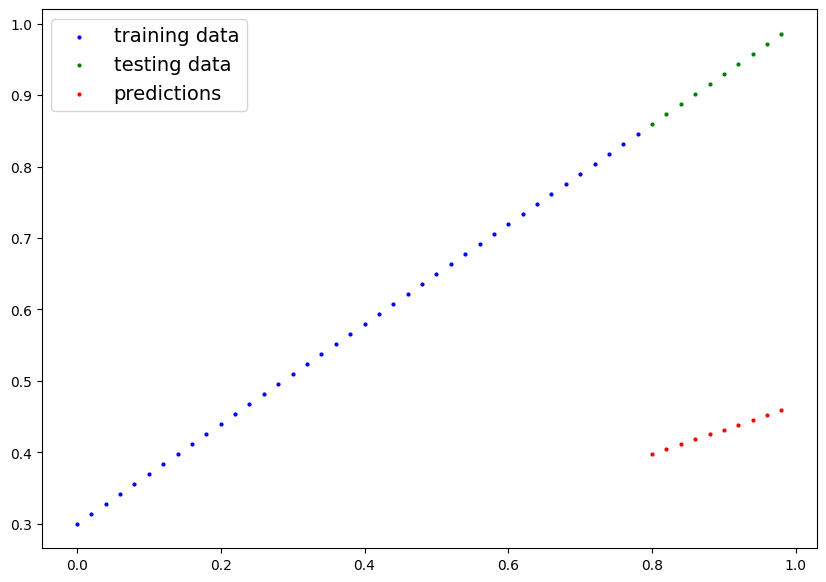

In [13]:
plot_prediction(predictions=y_preds)

Here, the  predictions are too far for the actual testing set.that why we will use loss function and optimizor to reduce the gap and make the model too accurate.

### Train model and find out lossfunction and use optimisers

In [14]:
#Train model
#Train the model to move out from unknown parameters to known parameters
#To get the correct predictions we will use loss functions--[measures how wrong your model predictions are to ideal ones.]
#we will use optimizers also--[Takes into account the loss of model and adjust the model parameters to improve the loss function.]
list(model_0.parameters()),model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [15]:
# set up Loss function
import torch.nn
MAE = torch.nn.L1Loss()
MAE

L1Loss()

In [16]:
#set up optimizeer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### Building a Training Loop and Testing Loop


In [17]:
list(model_0.parameters()),model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [18]:
#Training Loop
torch.manual_seed(42)

#An epoch is one loop through the data
epochs = 200 #(This is hyper-parameter because we set it)

#Tracking
epoch_count = []
loss_values = []
test_loss_values = []

#loop through the data
for epoch in range(epochs):
  model_0.train( ) #Train mode in pytroch sets all parameters that require gradients to require gradients
  y_preds = model_0(X_train)  #Forward pass
  loss = MAE(y_preds,y_train) #caluculate loss function

  optimizer.zero_grad( ) #optimizer Zero_grad - Remove all the previous gradients
  loss.backward( ) #Back propagation
  optimizer.step() #optimizer step-perform gradient descent


  #Testing Loop
  model_0.eval()
  with torch.inference_mode():
    y_preds_test = model_0(X_test)
    test_loss = MAE(y_preds_test,y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | loss:{loss} | test_loss:{test_loss}|---{model_0.state_dict()}")

Epoch:0 | loss:0.31288138031959534 | test_loss:0.48106518387794495|---OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch:10 | loss:0.1976713240146637 | test_loss:0.3463551998138428|---OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch:20 | loss:0.08908725529909134 | test_loss:0.21729660034179688|---OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch:30 | loss:0.053148526698350906 | test_loss:0.14464017748832703|---OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch:40 | loss:0.04543796554207802 | test_loss:0.11360953003168106|---OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch:50 | loss:0.04167863354086876 | test_loss:0.09919948130846024|---OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch:60 | loss:0.03818932920694351 | test_loss:0.08886633068323135|---OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch:70 | loss:0.0347

/tmp/ipython-input-2545100568.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train_loss")


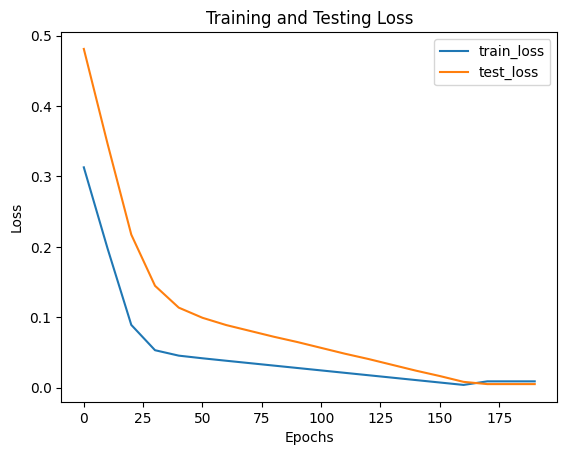

In [19]:
#plot the loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train_loss")
plt.plot(epoch_count,test_loss_values,label="test_loss")
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

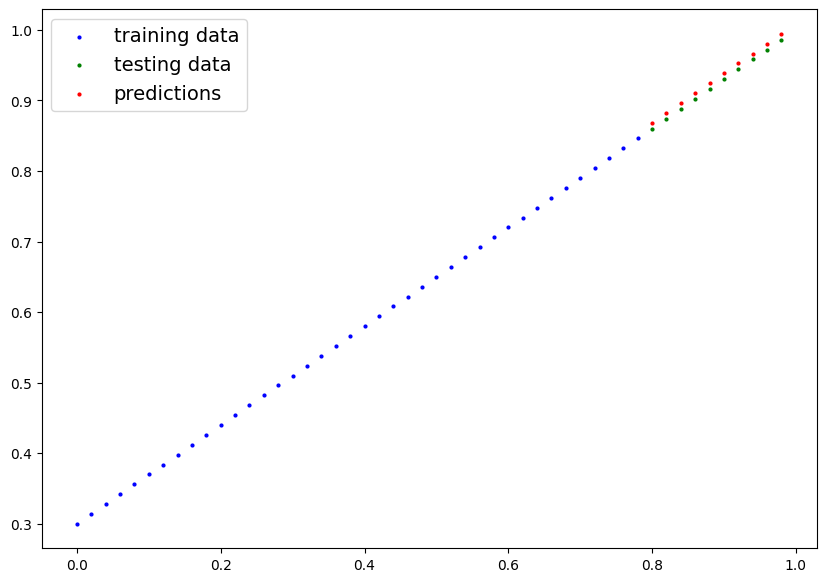

In [20]:
plot_prediction(predictions=y_preds_test)

### Saving a model

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
#saving the state_dic()
from pathlib import Path

#create a directory
model_path = Path("Models")
model_path.mkdir(parents=True,exist_ok=True)


#save the model state dict
torch.save(obj=model_0.state_dict(),f="Models/01_pytorch_model.pth")


### Load the model

In [28]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1965 Oct 26 15:22 01_pytorch_model.pth


In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# To load the saved state_dict , we want to instantiate a new instance of our model
loaded_model_0 = linear_regression_model()

#Load the saved state_dic
loaded_model_0.load_state_dict(torch.load(f="Models/01_pytorch_model.pth"))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [34]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [38]:
y_preds_test

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
#compare loaded preds and original preds
y_preds_test == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### summary [nn.linear_layers]

In [85]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [86]:
device =  'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [87]:
#Data
weights = 0.7
bias = 0.3


X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weights * X + bias

len(X),len(y)

(50, 50)

In [88]:
#train_split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

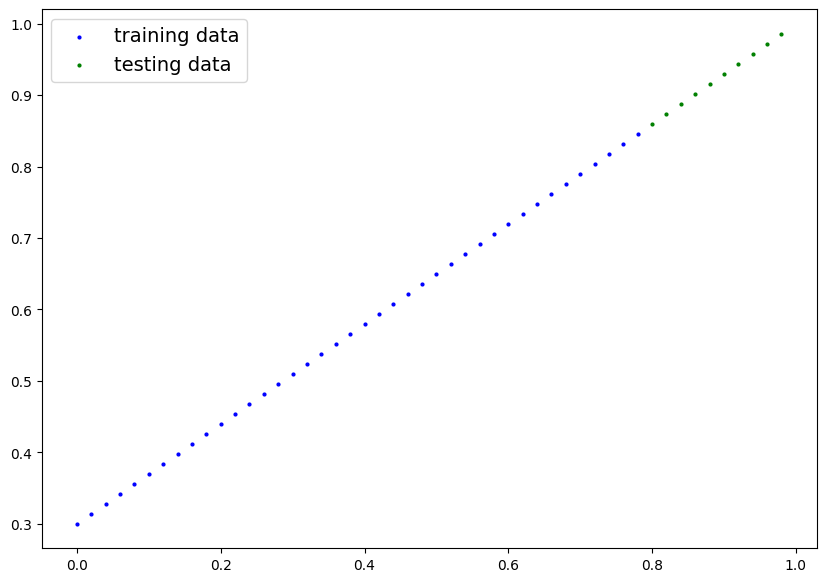

In [89]:
plot_prediction(X_train,X_test,y_train,y_test)

In [100]:
#Create a linear model
class linearRegression_layer(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1) ##layers for parameters

  def forward(self,x:torch.Tensor):
    return self.linear_layer(x)

In [101]:
#set manual seed
torch.manual_seed(42)

#crearte an instance
model_layer = linearRegression_layer()
model_layer.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [102]:
with torch.inference_mode():
  y_preds_layer = model_layer(X_test)

y_preds_layer,y_test

(tensor([[1.4416],
         [1.4569],
         [1.4722],
         [1.4875],
         [1.5028],
         [1.5181],
         [1.5334],
         [1.5487],
         [1.5640],
         [1.5793]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

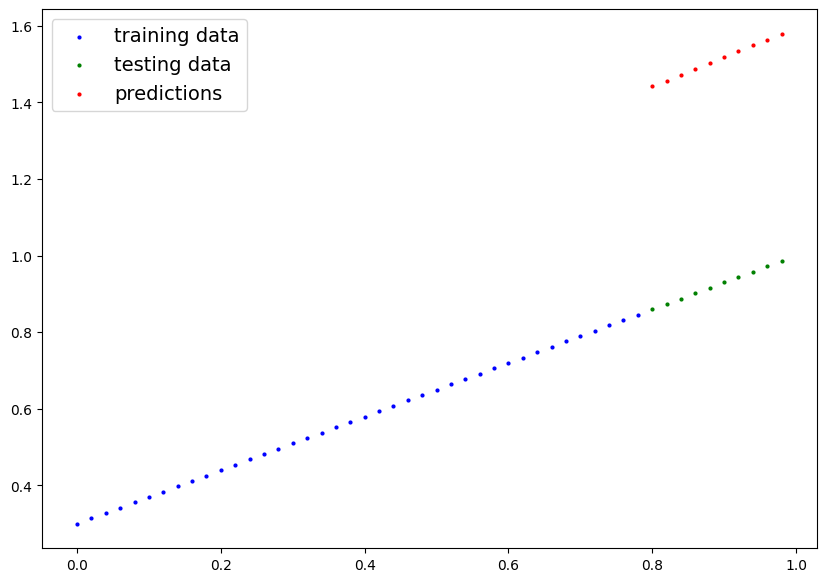

In [103]:
plot_prediction(predictions=y_preds_layer)

In [104]:
## Loss function and optimizer
loss_layer = nn.L1Loss()
optimizer_layer = torch.optim.SGD(params=model_layer.parameters(),lr=0.01)

In [105]:
#Training Loop
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_layer.train() #intialize the model
  y_preds_layer = model_layer(X_train) #forward Pass
  loss = loss_layer(y_preds_layer,y_train) #loss-function

  optimizer_layer.zero_grad() #optimize Zero-grad
  loss.backward() # Back-propagation
  optimizer_layer.step() #Gradient descent

  # Tessting Loop
  with torch.inference_mode():
    y_preds_test_layer = model_layer(X_test)

    test_loss = loss_layer(y_preds_test_layer,y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | loss:{loss} | test_loss:{test_loss}|---{model_layer.state_dict()}")



Epoch:0 | loss:0.5551779866218567 | test_loss:0.5739762187004089|---OrderedDict({'linear_layer.weight': tensor([[0.7606]]), 'linear_layer.bias': tensor([0.8200])})
Epoch:10 | loss:0.4399680495262146 | test_loss:0.4392663538455963|---OrderedDict({'linear_layer.weight': tensor([[0.7216]]), 'linear_layer.bias': tensor([0.7200])})
Epoch:20 | loss:0.3247582018375397 | test_loss:0.30455657839775085|---OrderedDict({'linear_layer.weight': tensor([[0.6826]]), 'linear_layer.bias': tensor([0.6200])})
Epoch:30 | loss:0.20954827964305878 | test_loss:0.16984674334526062|---OrderedDict({'linear_layer.weight': tensor([[0.6436]]), 'linear_layer.bias': tensor([0.5200])})
Epoch:40 | loss:0.09433844685554504 | test_loss:0.03513689711689949|---OrderedDict({'linear_layer.weight': tensor([[0.6046]]), 'linear_layer.bias': tensor([0.4200])})
Epoch:50 | loss:0.023886386305093765 | test_loss:0.04784906655550003|---OrderedDict({'linear_layer.weight': tensor([[0.5872]]), 'linear_layer.bias': tensor([0.3525])})
Epo

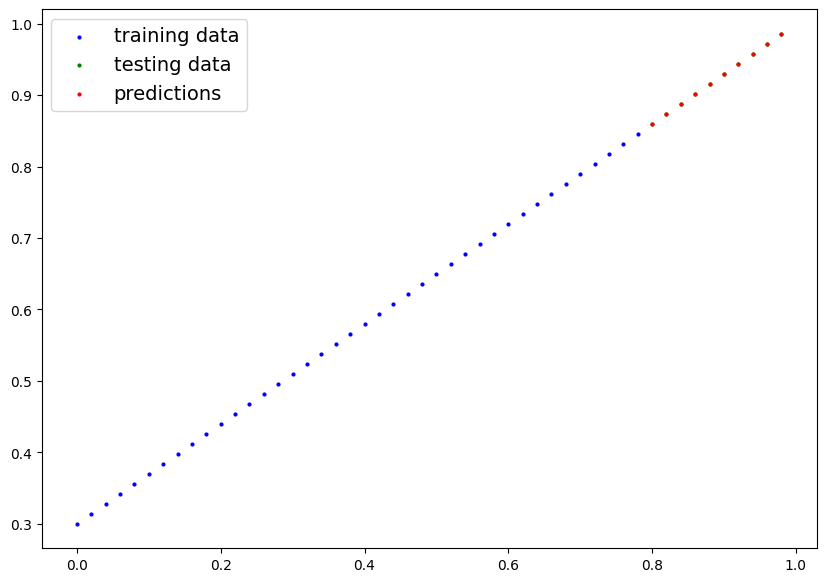

In [106]:
plot_prediction(predictions=y_preds_test_layer)